In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pickle as pk


In [2]:
energy = [[] for k in range(2, 8)]
for k in range(2, 8):
    with open('VaryM_loop\\QMCENERG_x=z_beta1_m' + str(k) + '.txt', 'rb') as fichier:
        energy[k - 2] = pk.load(fichier)

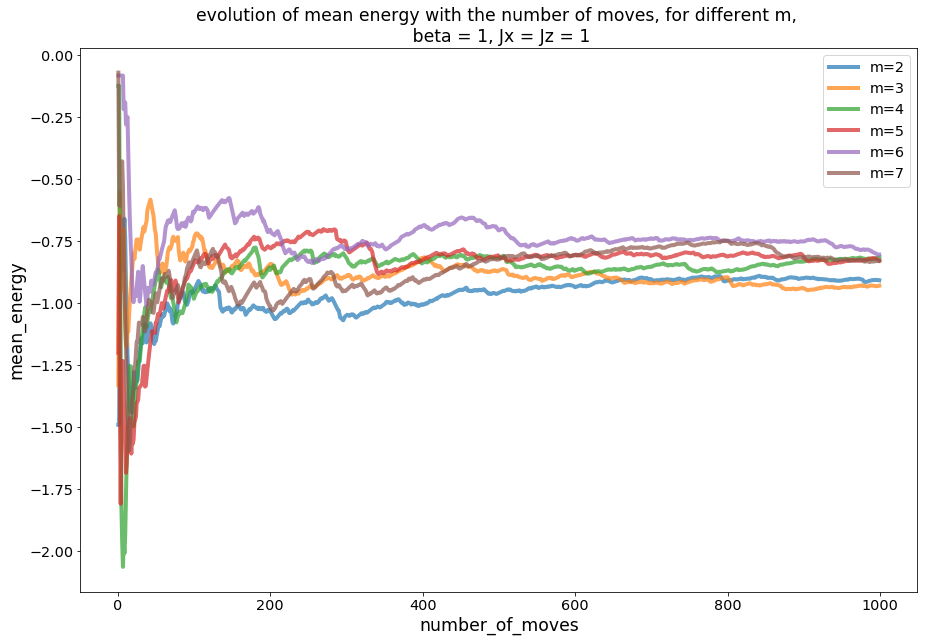

In [3]:
fig = plt.figure(figsize = (15,10))
x=np.arange(1, 1e3)
menergy = [[] for k in range(2,8)]
for k in range(2, 8):
    menergy[k - 2] = np.cumsum(energy[k - 2][1:1000]) / x


plt.xlabel('number_of_moves', fontsize = 'xx-large')
plt.ylabel('mean_energy', fontsize = 'xx-large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.title('evolution of mean energy with the number of moves, for different m, \n beta = 1, Jx = Jz = 1', fontsize = 'xx-large')

for k in range(2, 8):
    plt.plot(x, menergy[k-2], label = 'm='+str(k), lw = 4, alpha = 0.7)


plt.legend(loc = 0, fontsize = 'x-large')
#plt.savefig('mean_energy_evolution_loop_x=z=1_m2-7.png')

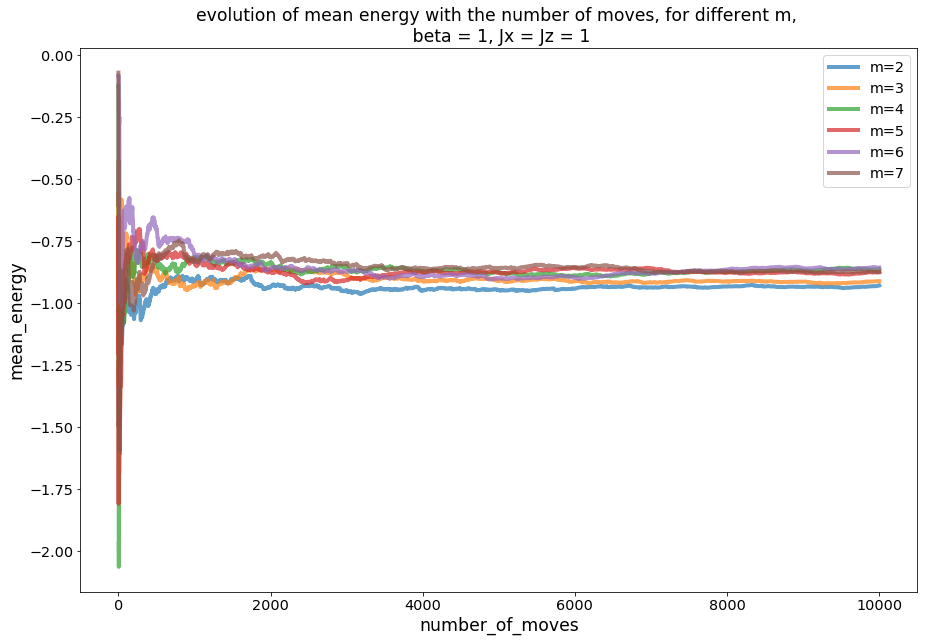

In [4]:
fig = plt.figure(figsize = (15,10))
x=np.arange(1, 1e4)
menergy = [[] for k in range(2,8)]
for k in range(2, 8):
    menergy[k - 2] = np.cumsum(energy[k - 2][1:10000]) / x


plt.xlabel('number_of_moves', fontsize = 'xx-large')
plt.ylabel('mean_energy', fontsize = 'xx-large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.title('evolution of mean energy with the number of moves, for different m, \n beta = 1, Jx = Jz = 1', fontsize = 'xx-large')

for k in range(2, 8):
    plt.plot(x, menergy[k-2], label = 'm='+str(k), lw = 4, alpha = 0.7)


plt.legend(loc = 0, fontsize = 'x-large')
#plt.savefig('mean_energy_evolution_larger_loop_x=z=1_m2-7.png')

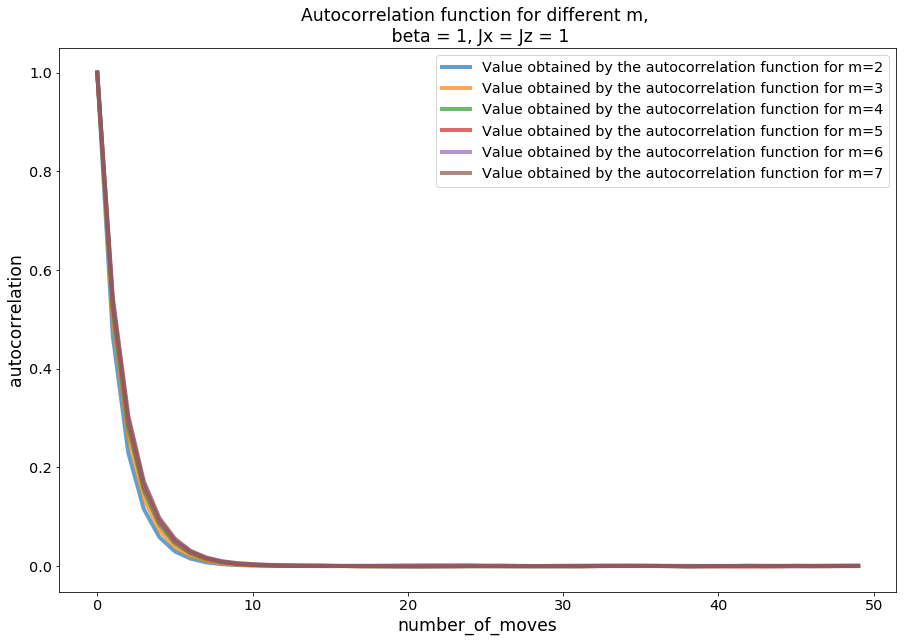

In [5]:
sqmean = [np.mean(energy[k][:10000000 - 500] * energy[k][:10000000 - 500]) for k in range(6)]
meansq = [np.mean(energy[k][:10000000 - 500]) ** 2 for k in range(6)]
autoco = [np.zeros(500) for k in range(6)]

for k in range(6):
    for t in range (500):
        Energies_tmove = (energy[k][t:t+10000000 - 500])
        corr = np.mean(energy[k][:10000000 - 500] * Energies_tmove)
        autoco[k][t] = (corr - meansq[k])/(sqmean[k] - meansq[k])
x=np.linspace(0,499,500)


fig = plt.figure(figsize = (15,10))

plt.xlabel('number_of_moves', fontsize = 'xx-large')
plt.ylabel('autocorrelation', fontsize = 'xx-large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.title('Autocorrelation function for different m, \n beta = 1, Jx = Jz = 1', fontsize = 'xx-large')

for k in range(2, 8):
    plt.plot(x[:50], autoco[k-2][:50], label = 'Value obtained by the autocorrelation function for m='+str(k),
             lw = 4, alpha = 0.7)

plt.legend(loc = 0, fontsize = 'x-large')
plt.savefig('autocorr_loop_x=y.png')

0.9966088528322469 1.356655333087872
0.9969781717340062 1.4861923754848991
0.9966719815113102 1.5785328525202336
0.9969047277556062 1.6287173335277765
0.9969711210472888 1.6639742835646976
0.9970419441849369 1.6929990975065734
[1.356655333087872, 1.4861923754848991, 1.5785328525202336, 1.6287173335277765, 1.6639742835646976, 1.6929990975065734]


<IPython.core.display.Javascript object>


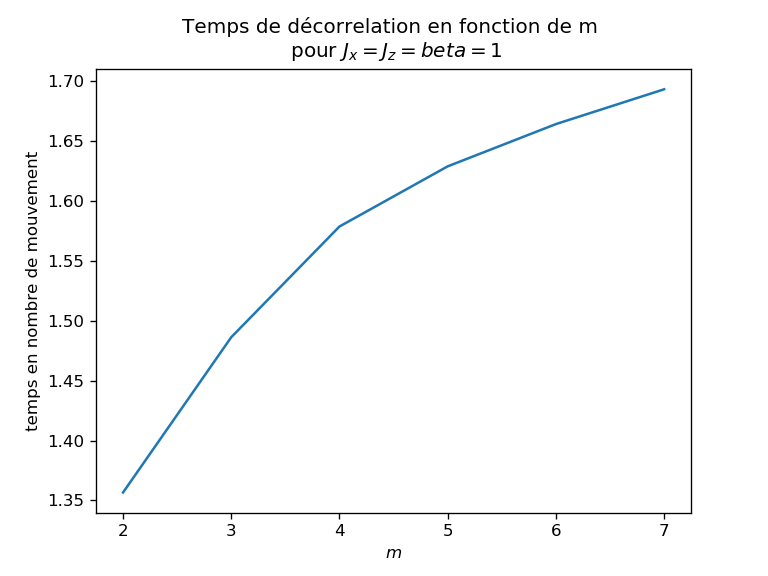

'\nplt.plot(autoco[1][0:n_fit_pts], \'-ro\', lw=2, alpha=0.5)\n\nplt.plot(xr, f(xr, a, b), \'b-\', lw=2)\n\n\nplt.title("Autocorrelation function", fontsize=25)\nplt.xlabel("$t$", fontsize=20)\nplt.ylabel(r"$\\mathcal{C}(t)$", fontsize=20)\n#plt.xlim(0, n_fit_pts+10)\n'

In [22]:
%matplotlib notebook
from scipy.optimize import curve_fit

res = []
n_fit_pts = 38
xr = np.arange(n_fit_pts, dtype=float)

# fit autocorrelation function
for k in range(6):
    f = lambda x, a, b: a*np.exp(-x/float(b))
    a, b = curve_fit(f, xr, (autoco[k])[0:n_fit_pts])[0]
    print(a, b)
    res += [b]

print(res)
plt.plot(np.arange(2, 8), res)

plt.title('Temps de décorrelation en fonction de m \n pour $J_x = J_z = beta = 1$')

plt.xlabel('$m$')
plt.ylabel('temps en nombre de mouvement')

plt.savefig('temps_deco.png')
'''
plt.plot(autoco[1][0:n_fit_pts], '-ro', lw=2, alpha=0.5)

plt.plot(xr, f(xr, a, b), 'b-', lw=2)


plt.title("Autocorrelation function", fontsize=25)
plt.xlabel("$t$", fontsize=20)
plt.ylabel(r"$\mathcal{C}(t)$", fontsize=20)
#plt.xlim(0, n_fit_pts+10)
'''